Data Exploration and Understanding

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [9]:
# Load dataset
df = pd.read_csv("student_success_dataset.csv")
# Basic Exploration
print(df.head())  # Show first few rows of the dataset
print(df.info())  # Check the data types and missing values
print(df.describe())  # Summary statistics



  student_id  age      gender socioeconomic_status  previous_gpa  \
0    STU0001   21  Non-binary                  Low          3.35   
1    STU0002   19        Male               Middle          4.00   
2    STU0003   21        Male                  Low          1.72   
3    STU0004   24  Non-binary               Middle          3.09   
4    STU0005   19      Female                  Low          2.24   

   attendance_rate  participation_score  assignment_completion family_support  \
0             0.73                 10.0                   63.8           High   
1             0.83                  6.2                   45.7         Medium   
2             0.72                  9.1                   90.3           High   
3             0.81                  6.5                   58.9           High   
4             0.83                  9.1                   93.0           High   

                            study_resources  study_hours_per_week  \
0               Textbooks, Online R

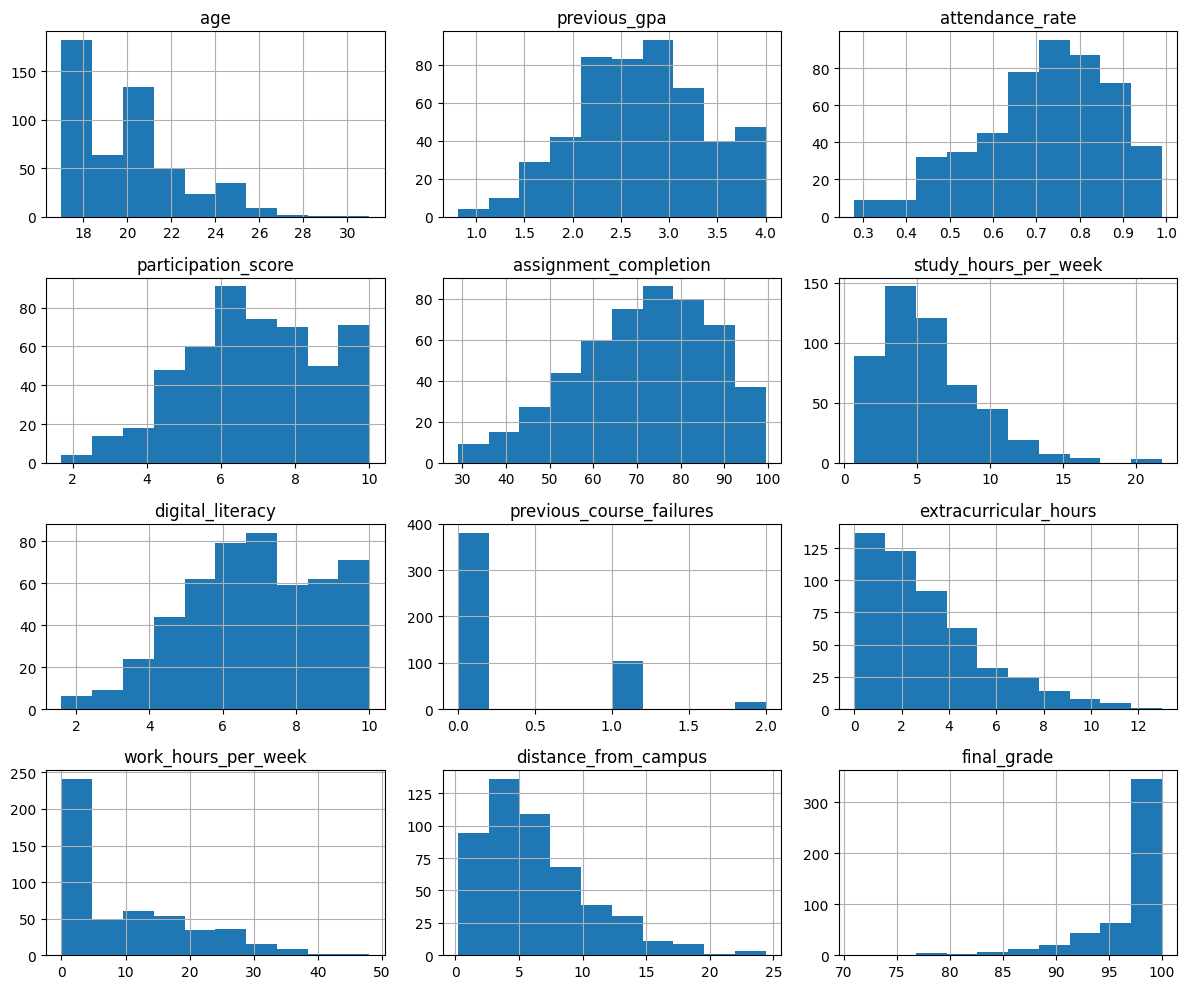

In [10]:
# Visualize distributions of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



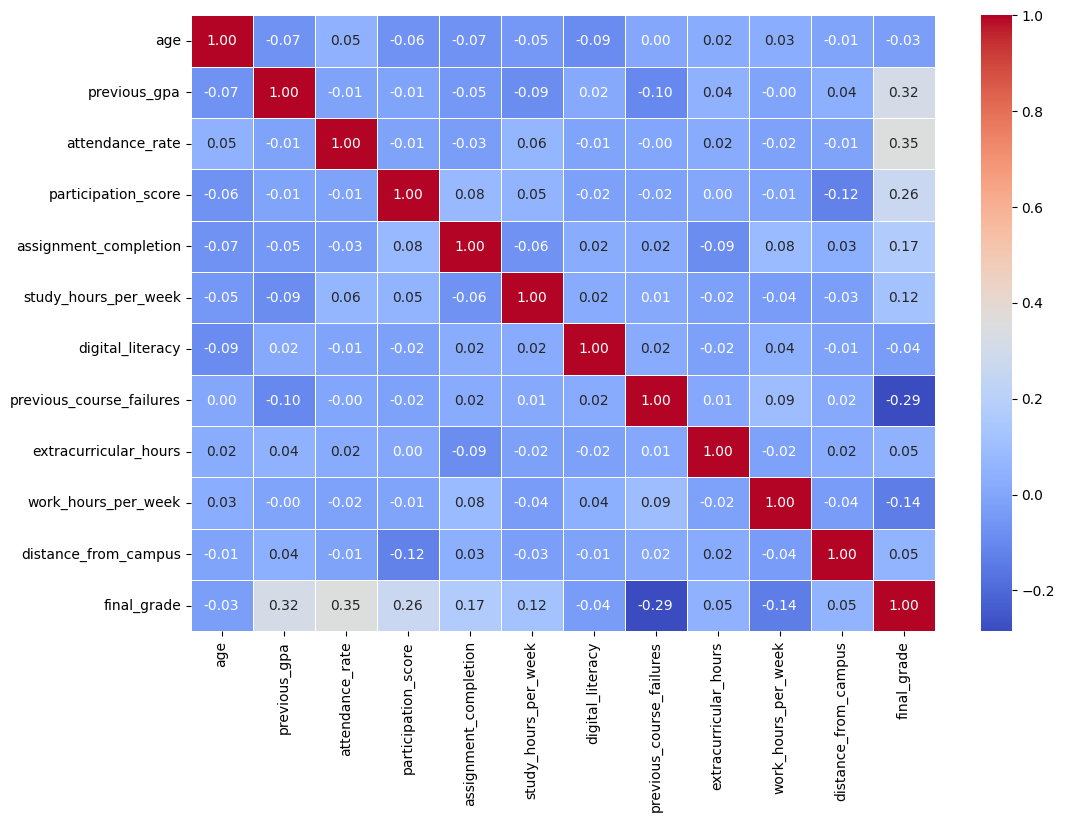

In [12]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


2. Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder




In [23]:
# Fill missing values in numeric columns with mean
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# Fill missing values in categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



C:\Users\BeiTupa\AppData\Local\Temp\ipykernel_15016\668604030.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [24]:
# Categorical Encoding (One-Hot Encoding for categorical variables)
categorical_features = df.select_dtypes(include=[object]).columns
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)



In [17]:
# Normalize Numerical Features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])



In [18]:
# Train-Test Split
X = df_encoded.drop('final_grade', axis=1)  # Drop the target variable
y = df_encoded['final_grade']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Feature Engineering

In [22]:
# Example of Feature Engineering: Calculate 'study_time' per student based on available columns
df_encoded['study_time_per_week'] = df_encoded['study_time'] / df_encoded['weeks_in_class']

# Dimensionality Reduction (PCA) if needed
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2 components (example)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('PCA Components')
plt.show()


KeyError: 'study_time'

4. Model Development

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Fit models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

lr_mse, lr_r2 = evaluate_model(y_test, y_pred_lr)
ridge_mse, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
lasso_mse, lasso_r2 = evaluate_model(y_test, y_pred_lasso)

print(f"Linear Regression: MSE = {lr_mse}, R2 = {lr_r2}")
print(f"Ridge Regression: MSE = {ridge_mse}, R2 = {ridge_r2}")
print(f"Lasso Regression: MSE = {lasso_mse}, R2 = {lasso_r2}")


5. Analysis & Interpretation

In [ ]:
# Coefficients of the Linear Regression Model
lr_coefficients = pd.DataFrame(lr_model.coef_, X_train.columns, columns=['Coefficient'])
print(lr_coefficients)

# Visualize feature importance (for example, using the coefficients of the linear regression)
plt.figure(figsize=(10, 6))
sns.barplot(x=lr_coefficients.index, y=lr_coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()
